In [1]:

!pip install preprocessor
!pip install country_converter

  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4477 sha256=2afb8daf70be43e4bb69dc7a71804a77438e2b7a360b3eb485068a55c7e72d73
  Stored in directory: /root/.cache/pip/wheels/0e/b7/36/aa37256db62b4bfd35a6f1b5536e9ba843f257b79dcbf3d5f1
Successfully built preprocessor
     |████████████████████████████████| 50 kB 2.2 MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.4-py3-none-any.whl size=53543 sha256=43119d66c67d8b721b907cb1c7447e5164c81b62d2664f593e50c6491a8eb187
  Stored in directory: /root/.cache/pip/wheels/69/cf/84/9ebca78737327440a0bb5faa6d0380e9017730534cf0dbcb8c
Successfully built country-converter


In [2]:
!pip install python-twitter

     |████████████████████████████████| 67 kB 3.8 MB/s 


In [3]:
import os
import tweepy as tw
import pandas as pd
import csv
import re 
import string
import preprocessor as p
from google.colab import drive
import time
# drive.mount('/content/drive')

# Davidson's keys
# consumer_key = 'xx'
# consumer_secret = 'x'
# access_token= 'xx-x'
# access_token_secret = 'x'


In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True) #Waitonratelimitnotify, 3200 - acad might be different


REF : https://towardsdatascience.com/twitter-json-data-processing-3f353a5deac4


In [ ]:
def flatten_tweets(tweets):
    """ Flattens out tweet dictionaries so relevant JSON is 
        in a top-level dictionary. """
    
    tweets_list = []
    
    # Iterate through each tweet
    for i in tweets:
        tweet_obj=i._json

        tweet_obj['verified'] = tweet_obj['user']['verified']
        tweet_obj['favourites_count'] = tweet_obj['user']['favourites_count']
        tweet_obj['retweet_count'] = tweet_obj['retweet_count']


        ''' User info'''
        # Store the user screen name in 'user-screen_name'
        tweet_obj['user-screen_name'] = tweet_obj['user']['screen_name']
        
        # Store the user location
        tweet_obj['user-location'] = tweet_obj['user']['location']
        
        # Store the user hashtag
        tweet_obj['hashtag_list'] = tweet_obj['entities']['hashtags']
    
        ''' Text info'''
        # Check if this is a 140+ character tweet
        if 'extended_tweet' in tweet_obj:
            print(tweet_obj['extended_tweet'])
            # Store the extended tweet text in 'extended_tweet-full_text'
            tweet_obj['extended_tweet-full_text'] = \
                                    tweet_obj['extended_tweet']['full_text']
    
        if 'retweeted_status' in tweet_obj:
            # Store the retweet user screen name in 
            # 'retweeted_status-user-screen_name'
            tweet_obj['retweeted_status-user-screen_name'] = \
                        tweet_obj['retweeted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['retweeted_status-text'] = \
                                        tweet_obj['retweeted_status']['text']
    
            if 'extended_tweet' in tweet_obj['retweeted_status']:
                # Store the extended retweet text in 
                #'retweeted_status-extended_tweet-full_text'
                tweet_obj['retweeted_status-extended_tweet-full_text'] = \
                tweet_obj['retweeted_status']['extended_tweet']['full_text']
                
        if 'quoted_status' in tweet_obj:
            # Store the retweet user screen name in 
            #'retweeted_status-user-screen_name'
            tweet_obj['quoted_status-user-screen_name'] = \
                            tweet_obj['quoted_status']['user']['screen_name']

            # Store the retweet text in 'retweeted_status-text'
            tweet_obj['quoted_status-text'] = \
                                            tweet_obj['quoted_status']['text']
    
            if 'extended_tweet' in tweet_obj['quoted_status']:
                # Store the extended retweet text in 
                #'retweeted_status-extended_tweet-full_text'
                tweet_obj['quoted_status-extended_tweet-full_text'] = \
                    tweet_obj['quoted_status']['extended_tweet']['full_text']
        
        ''' Place info'''
        if 'place' in tweet_obj:
            # Store the country code in 'place-country_code'
            try:
                tweet_obj['place-country'] = \
                                            tweet_obj['place']['country']
                
                tweet_obj['place-country_code'] = \
                                            tweet_obj['place']['country_code']
                
                tweet_obj['location-coordinates'] = \
                            tweet_obj['place']['bounding_box']['coordinates']
            except: pass
        
        tweets_list.append(tweet_obj)
        
    return tweets_list

In [ ]:
def select_text(tweets):
    ''' Assigns the main text to only one column depending
        on whether the tweet is a RT/quote or not'''
    
    tweets_list = []
    
    # Iterate through each tweet
    for tweet_obj in tweets:
        
        if 'retweeted_status-extended_tweet-full_text' in tweet_obj:
            tweet_obj['text'] = \
                        tweet_obj['retweeted_status-extended_tweet-full_text']
        
        elif 'retweeted_status-text' in tweet_obj:
            tweet_obj['text'] = tweet_obj['retweeted_status-text']
            
        elif 'extended_tweet-full_text' in tweet_obj:
                    tweet_obj['text'] = tweet_obj['extended_tweet-full_text']
                
        tweets_list.append(tweet_obj)
        
    return tweets_list

In [ ]:
search_words = "Support Small Business"
# date_since = "2022-1-22"

tweets = tw.Cursor(api.search_full_archive,
              query=search_words +" lang:en -RT",
              # lang="en",
              toDate=202201020000,
              environment_name='entireData').items(1000)
# results = api.GetSearch(
#     raw_query="q=twitter%20&result_type=recent&since=2014-07-19&count=100")


In [ ]:
from datetime import datetime, timedelta
print(str(datetime.now()).replace('-','')[:-15])

20220331 


In [ ]:
(datetime.now()- timedelta(days=1)).day

30

In [ ]:
x = flatten_tweets(tweets)
type(x)
# for i in tweets:
#   print(i._json)

list

In [ ]:
pd.DataFrame(x).to_csv('cleanThis.csv',index=False)

In [ ]:
# x[0]

In [ ]:
len(pd.DataFrame(x)['text'].unique())

100

In [ ]:
x[0]['text'][:2] == 'RT'

False

CODES NEED TO BE UPDATED FROM HERE


In [ ]:
import pandas as pd

# flatten tweets
tweets_flat = flatten_tweets(tweets)

# select text
tweets = select_text(tweets_flat)
columns = ['text', 'lang', 'user-location', 'place-country', 
           'place-country_code', 'location-coordinates', 
           'user-screen_name','hashtag_list']

# Create a DataFrame from `tweets`
df_tweets = pd.DataFrame(tweets, columns=columns)
# replaces NaNs by Nones
df_tweets.where(pd.notnull(df_tweets), None, inplace=True)

In [ ]:
import country_converter as coco

# change codes to iso3 
to_iso3_func = lambda x: coco.convert(names=x, to='iso3', not_found=None) \
                            if x is not None else x

df_tweets['place-country_code'] = \
                   df_tweets['place-country_code'].apply(to_iso3_func)

# change name to standard name
to_std_func = lambda x: coco.convert(names=x, to='name_short', not_found=None) \
                            if x is not None else x

df_tweets['place-country'] = \
                        df_tweets['place-country'].apply(to_std_func)

In [ ]:
hashlist=[]
for i in df_tweets['hashtag_list']:
  if len(i) != 0:
    # print(type(i))
    for j in i:
      hashlist.append(j['text'])

# IMPORTANT (HASHTAGS)

In [ ]:
# importing Counter module
from collections import Counter

In [ ]:
# import matplotlib.pyplot as plt
w = Counter(hashlist)
w

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


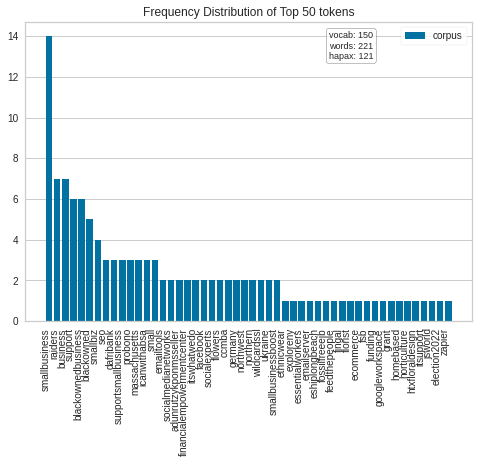

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

# # Load the text data
# corpus = load_hobbies()

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(hashlist)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

tqdm.pandas()

def geo_locator(user_location):
    
    # initialize geolocator
    geolocator = Nominatim(user_agent='Tweet_locator')

    if user_location is not None:
        try :
            # get location
            location = geolocator.geocode(user_location, language='en')
            # get coordinates
            location_exact = geolocator.reverse(
                        [location.latitude, location.longitude], language='en')
            # get country codes
            c_code = location_exact.raw['address']['country_code']

            return c_code

        except:
            return None

    else : 
        return None

# apply geo locator to user-location
loc = df_tweets['user-location'].progress_apply(geo_locator)
df_tweets['user-country_code'] = loc

# change codes to iso3 
df_tweets['user-country_code'] = \
                    df_tweets['user-country_code'].apply(to_iso3_func)

# create user-country column
df_tweets['user-country'] = \
                    df_tweets['user-country_code'].apply(to_std_func)

# drop old column
df_tweets.drop(['user-location'], axis=1, inplace=True)

100%|██████████| 1000/1000 [13:36<00:00,  1.23it/s]


In [ ]:
countries, codes = [], []
for idx, row in df_tweets.iterrows():
    if row['place-country_code'] is None:
        country = row['user-country']
        code = row['user-country_code']
        countries.append(country)
        codes.append(code)
    else :
        countries.append(row['place-country'])
        codes.append(row['place-country_code'])

df_tweets['location'] = countries
df_tweets['location_code'] = codes

# drop old columns
df_tweets.drop(columns=['place-country', 'place-country_code', 
                 'user-country', 'user-country_code'], inplace=True)

In [ ]:
# names = []
# for idx, row in df_tweets.iterrows():
#     lang = row['lang']
#     if lang == 'und':
#         names.append(None)
#     elif lang == 'in':
#         name = languages_dict['id']['name']
#         names.append(name)
#     elif lang == 'iw':
#         name = languages_dict['he']['name']
#         names.append(name)
#     else:
#         name = languages_dict[lang]['name']
#         names.append(name)

# df_tweets['language'] = names
# df_tweets.drop(['lang'], axis=1, inplace=True)

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def cleaner(string):
    
    # Generate list of tokens
    doc = nlp(string)
    lemmas = [token.lemma_ for token in doc]
    # Remove tokens that are not alphabetic 
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() 
                 or lemma == '-PRON-'] 
    # Print string after text cleaning
    return ' '.join(a_lemmas)

df_tweets['text_cleaned'] = \
                   df_tweets['text'].progress_apply(cleaner)

100%|██████████| 1000/1000 [00:12<00:00, 81.11it/s]


In [ ]:
df_tweets

,text,lang,location-coordinates,user-screen_name,hashtag_list,location,location_code,text_cleaned
0,@MsScarletBlade FFS! How frustrating for you.....,en,None,AnnaLaw17829694,[],None,None,FFS how frustrating for -PRON- that be not the...
1,We follow each other on Twitter does that mean...,en,None,JonathanDoesIt,[],United States,USA,-PRON- follow each other on Twitter do that me...
2,@APOSTLESULEMAN @teejanson @Portable_zehh @_As...,en,None,AdebakinTemito1,[],Nigeria,NGA,pls p
3,@aetherslumine @wfpilots support small business x,en,None,huqttao,[],None,None,support small business x
4,@Pikaclicks YESSIRRRRR I SUPPORT SMALL BUSINESS,en,None,weesterner,[],None,None,yessirrrrr -PRON- support small BUSINESS
...,...,...,...,...,...,...,...,...
995,Arts Business is small business.\n\nFor small ...,en,None,TablelandsArts,[],Australia,AUS,Arts Business be small business for small Busi...
996,🌸💖Support Small Business🌸💖\nShop at https://t....,en,None,prettythingsby3,"[{'text': 'BlackOwnedBusiness', 'indices': [59...",None,None,support Small Business Shop at blackownedbusin...
997,🌸💖Support Small Business🌸💖\nShop at https://t....,en,None,prettythingsby3,"[{'text': 'BlackOwnedBusiness', 'indices': [59...",None,None,support Small Business Shop at blackownedbusin...
998,🌸💖Support Small Business🌸💖\nShop at https://t....,en,None,prettythingsby3,"[{'text': 'BlackOwnedBusiness', 'indices': [59...",None,None,support Small Business Shop at blackownedbusin...


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df_sentiment = df_tweets.copy()

# instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentiment_scores = df_sentiment['text_cleaned'].progress_apply(
                                                            sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])
df_sentiment['sentiment'] = sentiment

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
100%|██████████| 1000/1000 [00:00<00:00, 3413.86it/s]


In [ ]:
df_sentiment

,text,lang,location-coordinates,user-screen_name,hashtag_list,location,location_code,text_cleaned,sentiment
0,@MsScarletBlade FFS! How frustrating for you.....,en,None,AnnaLaw17829694,[],None,None,FFS how frustrating for -PRON- that be not the...,-0.6940
1,We follow each other on Twitter does that mean...,en,None,JonathanDoesIt,[],United States,USA,-PRON- follow each other on Twitter do that me...,0.4019
2,@APOSTLESULEMAN @teejanson @Portable_zehh @_As...,en,None,AdebakinTemito1,[],Nigeria,NGA,pls p,0.0772
3,@aetherslumine @wfpilots support small business x,en,None,huqttao,[],None,None,support small business x,0.4019
4,@Pikaclicks YESSIRRRRR I SUPPORT SMALL BUSINESS,en,None,weesterner,[],None,None,yessirrrrr -PRON- support small BUSINESS,0.4019
...,...,...,...,...,...,...,...,...,...
995,Arts Business is small business.\n\nFor small ...,en,None,TablelandsArts,[],Australia,AUS,Arts Business be small business for small Busi...,0.0000
996,🌸💖Support Small Business🌸💖\nShop at https://t....,en,None,prettythingsby3,"[{'text': 'BlackOwnedBusiness', 'indices': [59...",None,None,support Small Business Shop at blackownedbusin...,0.4019
997,🌸💖Support Small Business🌸💖\nShop at https://t....,en,None,prettythingsby3,"[{'text': 'BlackOwnedBusiness', 'indices': [59...",None,None,support Small Business Shop at blackownedbusin...,0.4019
998,🌸💖Support Small Business🌸💖\nShop at https://t....,en,None,prettythingsby3,"[{'text': 'BlackOwnedBusiness', 'indices': [59...",None,None,support Small Business Shop at blackownedbusin...,0.4019


In [ ]:
import plotly.express as px

countries_lang = pd.read_csv('countries_lang_full.csv', index_col=0)

tweets_loc = df_sentiment.copy()

# group tweets by location
agg = {'text': 'count', 'sentiment': 'mean'}
tweets_loc = tweets_loc.groupby('location').agg(agg)
tweets_loc.sort_values(by='sentiment', ascending=False, inplace=True)
tweets_loc = tweets_loc.rename(columns={'text':'count'})

# get country codes
codes = []
for loc in tweets_loc.index:
    code = countries_lang[countries_lang.Country_name==loc]['Country_code']
    codes.append(code.values[0])
tweets_loc['country_code'] = codes

tweets_loc.reset_index(inplace=True)

# Plotly
fig = px.choropleth(tweets_loc, locations="country_code", 
                    color='sentiment',
                    hover_name='location', 
                    hover_data=['count'], 
                    color_continuous_scale='ice', scope='world') 

fig.update_layout(
    title_text = "Mean Twitter sentiment score by country",
    
    geo=dict(showframe=False, showcoastlines=False, 
             projection_type='equirectangular'),
    
    annotations = [dict(x=-0.04, y=0.95, xref='paper', yref='paper',
        text='Sentiment of tweets mentioning the small biz words', 
        showarrow=False)]
)

fig.update_geos(resolution=110, showcountries=False, 
                lataxis_range=[-55, 90], lonaxis_range=[-180, 180])

fig.show()

In [ ]:
# Data Pipeline
# Focus on pulling all the data of each tweet
# (Can pull 10k for now) Create an ability to pull 1-5 million tweets (23 tweets per min)
# Geotags are important , explore how many are there
# Likes, retweets, comments, and any associated useful metric per tweet 
# Always retain the tweet ID
# Once we have raw data
# Focus on cleaning
# Remove duplicates
# Transforming into good looking pandas dataframe (design the data structure) 


In [ ]:
tweet_pulled=df_sentiment
df_sentiment.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
text,1000,1000,@MsScarletBlade FFS! How frustrating for you.....,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lang,1000,1,en,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location-coordinates,25,23,"[[[17.9645481, -32.9258009], [18.0182414, -32....",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user-screen_name,1000,878,TreasuryMarine,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hashtag_list,1000,108,[],877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,642,54,United States,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_code,642,54,USA,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text_cleaned,1000,909,raila economic blueprint mainly focus on natio...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentiment,1000.0,NaN,NaN,NaN,0.436472,0.352443,-0.8126,0.3182,0.4588,0.6942,0.969


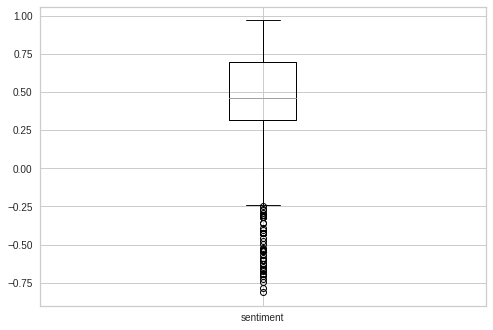

In [ ]:
tweet_pulled[['sentiment']].boxplot()

ALL BELOW ARE EXTRA

In [ ]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
class StdOutListener(StreamListener):

    def on_data(self, data):
        print (data)
        return True

    def on_error(self, status):
        print (status)


# if __name__ == '__main__':

#This handles Twitter authetification and the connection to Twitter Streaming API
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, l)

#This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
stream.filter(track=['python', 'javascript', 'ruby'])

{"created_at":"Thu Mar 03 06:08:10 +0000 2022","id":1499265354023018501,"id_str":"1499265354023018501","text":"T\u00e9l\u00e9gramme @willu239                          Snap \ud83d\udc7bsamuello66                                  Livraison et exp\u00e9di\u2026 https:\/\/t.co\/kO328tqMkE","display_text_range":[0,140],"source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":true,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":733760634706395137,"id_str":"733760634706395137","name":"willu","screen_name":"patoutm22","location":"Paris","url":null,"description":"livraison et exp\u00e9dition dans la France contact Snapchat \ud83d\udc49\ud83c\udfff samuello66    Telegram @willu239","translator_type":"none","protected":false,"verified":false,"followers_count":14,"friends_count":156,"listed_count":0,"favour

KeyboardInterrupt: ignored

DAVID CODE FOR LOCATION

In [ ]:
# import tweepy
import tweepy as tw
# authenticate
consumer_key = 'uJbX6lhdmzVPo6lOOBeDiRj93'
consumer_secret = 'o5AiZAoN45LnKj696QNbwWdZwHr7FTkYrrbyEtboxpn4fJofdU'
access_token= '1492785565594533889-maCchN69E6cbRBe4fOJAlolW9n8utd'
access_token_secret = '26eEMmpjAftW5dhYD10ThorpqW94afUquqHz8hzp98rlK'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# search_query = "#covid19 -filter:retweets"
# search_query = "Support Small Business OR Support Small Businesses OR Shop Local OR Mom Pop Business OwnersDay" 

# search_query = "Support Small Business -filter:retweets OR Support Small Businesses -filter:retweets OR Shop Local -filter:retweets"# OR Mom Pop Business Owners Day -filter:retweets" 

In [ ]:
def get_my_tweet(words):
  # get tweets from the API
  search_query = words+" -filter:retweets"
  # time.sleep(0.5)
  tweets = tw.Cursor(api.search,
                q=search_query,
                lang="en",
                since="2018-01-01").items(1000)
  # store the API responses in a list
  tweets_copy = []
  for tweet in tweets:
      tweets_copy.append(tweet)
      
  print("we got ",len(tweets_copy), " number of tweets")
  tweets_df = pd.DataFrame()
  # populate the dataframe
  for tweet in tweets_copy:
      hashtags = []
      try:
          for hashtag in tweet.entities["hashtags"]:
              hashtags.append(hashtag["text"])
          text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
      except:
          pass
      tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                                'user_location': tweet.user.location,\
                                                'user_description': tweet.user.description,
                                                'user_verified': tweet.user.verified,
                                                'date': tweet.created_at,
                                                'text': text, 
                                                'hashtags': [hashtags if hashtags else None],
                                                'source': tweet.source}))
      tweets_df = tweets_df.reset_index(drop=True)
      return tweets_df

In [ ]:
tweets_df_full = pd.DataFrame()

list_words=["Support Small Business","Support Small Businesses","Shop Local"]
for i in list_words:
  temp=get_my_tweet(i)
  tweets_df_full.append(temp)

we got  1000  number of tweets
we got  1000  number of tweets
we got  1000  number of tweets
